Viererplot für den Vergleich von

- LAMMPS -> Sassena
- LAMMPS -> Debye
- JAX-MD -> Sassena
- JAX-MD -> Debye

In [42]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [43]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

## JAX-MD

In [44]:
df_lammps_then_debye = pd.read_csv("../data/diffraction_patterns/lammps_then_debye.csv")
df_lammps_then_sassena = pd.read_csv("../data/diffraction_patterns/lammps_then_sassena.csv")
df_jaxmd_then_debye = pd.read_csv("../data/diffraction_patterns/jaxmd_then_debye.csv")
df_jaxmd_then_sassena = pd.read_csv("../data/diffraction_patterns/jaxmd_then_sassena.csv")

In [45]:
clip_max = 0.06
clip_min = -0.04

sassena_y_offset = 0.033
sassena_y_scale = 0.6

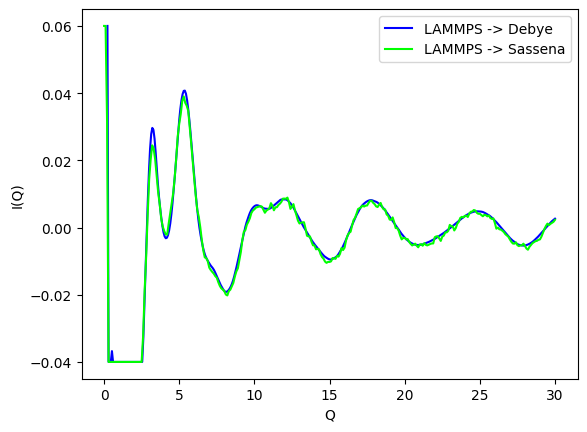

In [47]:
plt.plot(
    df_lammps_then_debye["Q"], 
    np.clip(df_lammps_then_debye["I_Q"], clip_min, clip_max), 
    label="LAMMPS -> Debye",
    c="blue")

# plt.plot(
#     df_jaxmd_then_debye["Q"], 
#     np.clip(df_jaxmd_then_debye["I_Q"], clip_min, clip_max), 
#     label="JAXMD -> Debye",
#     linestyle="dotted",
#     c="purple")

# plt.plot(
#     df_jaxmd_then_sassena["Q"], 
#     np.clip(df_jaxmd_then_sassena["I_Q"] * sassena_y_scale + sassena_y_offset, clip_min, clip_max), 
#     label="JAXMD -> Sassena",
#     c="green")

plt.plot(
    df_lammps_then_sassena["Q"], 
    np.clip(df_lammps_then_sassena["I_Q"] * sassena_y_scale + sassena_y_offset, clip_min, clip_max), 
    label="LAMMPS -> Sassena",
    #linestyle="dotted",
    c="lime")

plt.xlabel("Q")
plt.ylabel("I(Q)")
plt.legend()
plt.show()